In [3]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os, glob
import librosa
import librosa.display
import IPython
from IPython.display import Audio
from IPython.display import Image
import warnings; warnings.filterwarnings('ignore')

In [5]:
#native sample rate of dataset
sample_rate = 48000

In [3]:
def feature_melspectrogram(
    waveform, 
    sample_rate,
    fft = 1024,
    winlen = 512,
    window='hamming',
    hop=256,
    mels=128,
    ):
    
    melspectrogram = librosa.feature.melspectrogram(
        y=waveform, 
        sr=sample_rate, 
        n_fft=fft, 
        win_length=winlen, 
        window=window, 
        hop_length=hop, 
        n_mels=mels, 
        fmax=sample_rate/2)
    melspectrogram = librosa.power_to_db(melspectrogram, ref=np.max)
    
    return melspectrogram

In [4]:
def feature_mfcc(
    waveform, 
    sample_rate,
    n_mfcc = 40,
    fft = 1024,
    winlen = 512,
    window='hamming',
    #hop=256, 
    mels=128
    ):

    mfc_coefficients=librosa.feature.mfcc(
        y=waveform, 
        sr=sample_rate, 
        n_mfcc=n_mfcc,
        n_fft=fft, 
        win_length=winlen, 
        window=window, 
        #hop_length=hop, 
        n_mels=mels, 
        fmax=sample_rate/2
        ) 

    return mfc_coefficients

In [5]:
def get_features(waveforms, features, samplerate):

    file_count = 0
    for waveform in waveforms:
        mfccs = feature_mfcc(waveform, sample_rate)
        features.append(mfccs)
        file_count += 1
        # print progress 
        print('\r'+f' Processed {file_count}/{len(waveforms)} waveforms',end='')
    
    # return all features from list of waveforms
    return features

In [1]:
def get_waveforms(file):
    waveform, _ = librosa.load(file, duration=3, offset=0.5, sr=sample_rate)
    waveform_homo = np.zeros((int(sample_rate*3,)))
    waveform_homo[:len(waveform)] = waveform                                   
    return waveform_homo
emotions_dict ={
    '0':'surprised',
    '1':'neutral',
    '2':'calm',
    '3':'happy',
    '4':'sad',
    '5':'angry',
    '6':'fearful',
    '7':'disgust'
}

emotion_attributes = {
    '01': 'normal',
    '02': 'strong'
}

# Load data and features extraction

In [7]:
#data_path = 'Actor_01'

def load_data(data_path):
    emotions = []
    waveforms = []
    intensities, genders = [],[]
    
    file_count = 0
    for file in os.listdir(data_path):
        file_name = os.path.basename(file)
        file_ = data_path+'\\'+file
        emotion = file_name.split("-")[2]
        if emotion == 8:
            emotion = 0 
        intensity = emotion_attributes[file_name.split("-")[3]]
        if (int((file_name.split("-")[6]).split(".")[0]))%2==0: 
            gender = 'female' 
        else: 
            gender = 'male'
        waveform = get_waveforms(file_)
        
        waveforms.append(waveform)
        emotions.append(emotion)
        intensities.append(intensity) 
        genders.append(gender)
        
        file_count += 1
        print('\r'+f' Processed {file_count}/{1440} audio samples',end='')
        
    return waveforms, emotions, intensities, genders

In [8]:
wa,ea,ia,ga=[],[],[],[]
wa,ea,ia,ga=load_data('Actor_01')

 Processed 60/1440 audio samples

In [9]:
print(ea)

['01', '01', '01', '01', '02', '02', '02', '02', '02', '02', '02', '02', '03', '03', '03', '03', '03', '03', '03', '03', '04', '04', '04', '04', '04', '04', '04', '04', '05', '05', '05', '05', '05', '05', '05', '05', '06', '06', '06', '06', '06', '06', '06', '06', '07', '07', '07', '07', '07', '07', '07', '07', '08', '08', '08', '08', '08', '08', '08', '08']


In [10]:
w1,e1,i1,g1=[],[],[],[]
w1,e1,i1,g1=load_data('Actor_01')

 Processed 60/1440 audio samples

In [11]:
w2,e2,i2,g2=[],[],[],[]
w2,e2,i2,g2=load_data('Actor_02')

 Processed 60/1440 audio samples

In [12]:
w3,e3,i3,g3=[],[],[],[]
w3,e3,i3,g3=load_data('Actor_03')

 Processed 60/1440 audio samples

In [13]:
w4,e4,i4,g4=[],[],[],[]
w4,e4,i4,g4=load_data('Actor_04')

 Processed 60/1440 audio samples

In [14]:
w5,e5,i5,g5=[],[],[],[]
w5,e5,i5,g5=load_data('Actor_05')

 Processed 60/1440 audio samples

In [15]:
w6,e6,i6,g6=[],[],[],[]
w6,e6,i6,g6=load_data('Actor_06')

 Processed 60/1440 audio samples

In [16]:
w7,e7,i7,g7=[],[],[],[]
w7,e7,i7,g7=load_data('Actor_07')

 Processed 60/1440 audio samples

In [17]:
w8,e8,i8,g8=[],[],[],[]
w8,e8,i8,g8=load_data('Actor_08')

 Processed 60/1440 audio samples

In [18]:
w9,e9,i9,g9=[],[],[],[]
w9,e9,i9,g9=load_data('Actor_09')

 Processed 60/1440 audio samples

In [19]:
w10,e10,i10,g10=[],[],[],[]
w10,e10,i10,g10=load_data('Actor_10')

 Processed 60/1440 audio samples

In [20]:
w11,e11,i11,g11=[],[],[],[]
w11,e11,i11,g11=load_data('Actor_11')

 Processed 60/1440 audio samples

In [21]:
w12,e12,i12,g12=[],[],[],[]
w12,e12,i12,g12=load_data('Actor_12')

 Processed 60/1440 audio samples

In [22]:
w13,e13,i13,g13=[],[],[],[]
w13,e13,i13,g13=load_data('Actor_13')

 Processed 60/1440 audio samples

In [23]:
w14,e14,i14,g14=[],[],[],[]
w14,e14,i14,g14=load_data('Actor_14')

 Processed 60/1440 audio samples

In [24]:
w15,e15,i15,g15=[],[],[],[]
w15,e15,i15,g15=load_data('Actor_15')

 Processed 60/1440 audio samples

In [25]:
w16,e16,i16,g16=[],[],[],[]
w16,e16,i16,g16=load_data('Actor_16')

 Processed 60/1440 audio samples

In [26]:
w17,e17,i17,g17=[],[],[],[]
w17,e17,i17,g17=load_data('Actor_17')

 Processed 60/1440 audio samples

In [27]:
w18,e18,i18,g18=[],[],[],[]
w18,e18,i18,g18=load_data('Actor_18')

 Processed 60/1440 audio samples

In [28]:
w19,e19,i19,g19=[],[],[],[]
w19,e19,i19,g19=load_data('Actor_19')

 Processed 60/1440 audio samples

In [29]:
w20,e20,i20,g20=[],[],[],[]
w20,e20,i20,g20=load_data('Actor_20')

 Processed 60/1440 audio samples

In [30]:
w21,e21,i21,g21=[],[],[],[]
w21,e21,i21,g21=load_data('Actor_21')

 Processed 60/1440 audio samples

In [31]:
w22,e22,i22,g22=[],[],[],[]
w22,e22,i22,g22=load_data('Actor_22')

 Processed 60/1440 audio samples

In [32]:
w23,e23,i23,g23=[],[],[],[]
w23,e23,i23,g23=load_data('Actor_23')

 Processed 60/1440 audio samples

In [33]:
w24,e24,i24,g24=[],[],[],[]
w24,e24,i24,g24=load_data('Actor_24')

 Processed 60/1440 audio samples

In [34]:
waveforms=w1+w2+w3+w4+w5+w6+w7+w8+w9+w10+w11+w12+w13+w14+w15+w16+w17+w18+w19+w20+w21+w22+w23+w24
emotions=e1+e2+e3+e4+e5+e6+e7+e8+e9+e10+e11+e12+e13+e14+e15+e16+e17+e18+e19+e20+e21+e22+e23+e24
intensities=i1+i2+i3+i4+i5+i6+i7+i8+i9+i10+i11+i12+i13+i14+i15+i16+i17+i18+i19+i20+i21+i22+i23+i24
genders=g1+g2+g3+g4+g5+g6+g7+g8+g9+g10+g11+g12+g13+g14+g15+g16+g17+g18+g19+g20+g21+g22+g23+g24

In [33]:
#waveforms, emotions, intensities, genders = [],[],[],[]
#waveforms, emotions, intensities, genders = load_data()

In [35]:
print(waveforms)

[array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([1.44508920e-06, 2.57977172e-06, 1.36679387e-06, ...,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
       6.14715319e-08, 5.32825908e-08, 3.24373826e-11]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([1.27002870e-08, 3.02270529e-08, 2.10002558e-08, ...,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([-1.00352565e-06,  3.50546344e-07,  1.49016137e-06, ...,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00]), array([2.58085379e-06, 3.935369

In [36]:
print(emotions)

['01', '01', '01', '01', '02', '02', '02', '02', '02', '02', '02', '02', '03', '03', '03', '03', '03', '03', '03', '03', '04', '04', '04', '04', '04', '04', '04', '04', '05', '05', '05', '05', '05', '05', '05', '05', '06', '06', '06', '06', '06', '06', '06', '06', '07', '07', '07', '07', '07', '07', '07', '07', '08', '08', '08', '08', '08', '08', '08', '08', '01', '01', '01', '01', '02', '02', '02', '02', '02', '02', '02', '02', '03', '03', '03', '03', '03', '03', '03', '03', '04', '04', '04', '04', '04', '04', '04', '04', '05', '05', '05', '05', '05', '05', '05', '05', '06', '06', '06', '06', '06', '06', '06', '06', '07', '07', '07', '07', '07', '07', '07', '07', '08', '08', '08', '08', '08', '08', '08', '08', '01', '01', '01', '01', '02', '02', '02', '02', '02', '02', '02', '02', '03', '03', '03', '03', '03', '03', '03', '03', '04', '04', '04', '04', '04', '04', '04', '04', '05', '05', '05', '05', '05', '05', '05', '05', '06', '06', '06', '06', '06', '06', '06', '06', '07', '07', '07

In [37]:
print(intensities)

['normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'strong', 'strong', 'strong', 'strong', 'normal', 'normal', 'normal', 'normal', 'strong', 'strong', 'strong', 'strong', 'normal', 'normal', 'normal', 'normal', 'strong', 'strong', 'strong', 'strong', 'normal', 'normal', 'normal', 'normal', 'strong', 'strong', 'strong', 'strong', 'normal', 'normal', 'normal', 'normal', 'strong', 'strong', 'strong', 'strong', 'normal', 'normal', 'normal', 'normal', 'strong', 'strong', 'strong', 'strong', 'normal', 'normal', 'normal', 'normal', 'strong', 'strong', 'strong', 'strong', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'strong', 'strong', 'strong', 'strong', 'normal', 'normal', 'normal', 'normal', 'strong', 'strong', 'strong', 'strong', 'normal', 'normal', 'normal', 'normal', 'strong', 'strong', 'strong', 'strong', 'normal', 'normal', 'normal', 'normal', 'strong', 'strong', 'strong', 'strong', 'normal', 'normal', 'normal', 'normal',

In [38]:
print(genders)

['male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female',

In [39]:
print(f'Waveforms set: {len(waveforms)} samples')
print(f'Waveform signal length: {len(waveforms[0])}')
print(f'Emotions set: {len(emotions)} sample labels')

Waveforms set: 1440 samples
Waveform signal length: 144000
Emotions set: 1440 sample labels


In [40]:
train_set,valid_set,test_set = [],[],[]
X_train,X_valid,X_test = [],[],[]
y_train,y_valid,y_test = [],[],[]
waveforms = np.array(waveforms)
for emotion_num in range(len(emotions_dict)):
    emotion_indices_ = [index for index, emotion in enumerate(emotions) if int(emotion)==emotion_num]
    print(emotion_indices_)
    np.random.seed(69)
    emotion_indices = np.random.permutation(emotion_indices_)
    dim = len(emotion_indices_)
    train_indices = emotion_indices_[:int(0.8*dim)]
    valid_indices = emotion_indices_[int(0.8*dim):int(0.9*dim)]
    test_indices = emotion_indices_[int(0.9*dim):]
    X_train.append(waveforms[train_indices,:])
    y_train.append(np.array([emotion_num]*len(train_indices),dtype=np.int32))
    X_valid.append(waveforms[valid_indices,:])
    y_valid.append(np.array([emotion_num]*len(valid_indices),dtype=np.int32))
    # create test waveforms/labels sets
    X_test.append(waveforms[test_indices,:])
    y_test.append(np.array([emotion_num]*len(test_indices),dtype=np.int32))

    
    train_set.append(train_indices)
    valid_set.append(valid_indices)
    test_set.append(test_indices)


X_train = np.concatenate(X_train,axis=0)
X_valid = np.concatenate(X_valid,axis=0)
X_test = np.concatenate(X_test,axis=0)

# concatenate, in order, all emotions back into one array 
y_train = np.concatenate(y_train,axis=0)
y_valid = np.concatenate(y_valid,axis=0)
y_test = np.concatenate(y_test,axis=0)
train_set = np.concatenate(train_set,axis=0)
valid_set = np.concatenate(valid_set,axis=0)
test_set = np.concatenate(test_set,axis=0)
print(f'Training waveforms:{X_train.shape}, y_train:{y_train.shape}')
print(f'Validation waveforms:{X_valid.shape}, y_valid:{y_valid.shape}')
print(f'Test waveforms:{X_test.shape}, y_test:{y_test.shape}')
uniques, count = np.unique(np.concatenate([train_set,test_set,valid_set],axis=0), return_counts=True)
if sum(count==1) == len(emotions):
    print(f'\nSets are unique: {sum(count==1)} samples out of {len(emotions)} are unique')
else:
    print(f'\nSets are NOT unique: {sum(count==1)} samples out of {len(emotions)} are unique')

[]
[0, 1, 2, 3, 60, 61, 62, 63, 120, 121, 122, 123, 180, 181, 182, 183, 240, 241, 242, 243, 300, 301, 302, 303, 360, 361, 362, 363, 420, 421, 422, 423, 480, 481, 482, 483, 540, 541, 542, 543, 600, 601, 602, 603, 660, 661, 662, 663, 720, 721, 722, 723, 780, 781, 782, 783, 840, 841, 842, 843, 900, 901, 902, 903, 960, 961, 962, 963, 1020, 1021, 1022, 1023, 1080, 1081, 1082, 1083, 1140, 1141, 1142, 1143, 1200, 1201, 1202, 1203, 1260, 1261, 1262, 1263, 1320, 1321, 1322, 1323, 1380, 1381, 1382, 1383]
[4, 5, 6, 7, 8, 9, 10, 11, 64, 65, 66, 67, 68, 69, 70, 71, 124, 125, 126, 127, 128, 129, 130, 131, 184, 185, 186, 187, 188, 189, 190, 191, 244, 245, 246, 247, 248, 249, 250, 251, 304, 305, 306, 307, 308, 309, 310, 311, 364, 365, 366, 367, 368, 369, 370, 371, 424, 425, 426, 427, 428, 429, 430, 431, 484, 485, 486, 487, 488, 489, 490, 491, 544, 545, 546, 547, 548, 549, 550, 551, 604, 605, 606, 607, 608, 609, 610, 611, 664, 665, 666, 667, 668, 669, 670, 671, 724, 725, 726, 727, 728, 729, 730, 731, 7

In [41]:
features_train, features_valid, features_test = [],[],[]

print('Train waveforms:') # get training set features 
features_train = get_features(X_train, features_train, sample_rate)

print('\n\nValidation waveforms:') # get validation set features
features_valid = get_features(X_valid, features_valid, sample_rate)

print('\n\nTest waveforms:') # get test set features 
features_test = get_features(X_test, features_test, sample_rate)

print(f'\n\nFeatures set: {len(features_train)+len(features_test)+len(features_valid)} total, {len(features_train)} train, {len(features_valid)} validation, {len(features_test)} test samples')
print(f'Features (MFC coefficient matrix) shape: {len(features_train[0])} mel frequency coefficients x {len(features_train[0][1])} time steps')

Train waveforms:
 Processed 994/994 waveforms

Validation waveforms:
 Processed 124/124 waveforms

Test waveforms:
 Processed 130/130 waveforms

Features set: 1248 total, 994 train, 124 validation, 130 test samples
Features (MFC coefficient matrix) shape: 40 mel frequency coefficients x 282 time steps


# Augmenting the Data with AWGN - Additive White Gaussian Noise

In [42]:
def awgn_augmentation(waveform, multiples=2, bits=16, snr_min=15, snr_max=30): 
    wave_len = len(waveform)
    noise = np.random.normal(size=(multiples, wave_len))
    norm_constant = 2.0**(bits-1)
    norm_wave = waveform / norm_constant
    norm_noise = noise / norm_constant
    signal_power = np.sum(norm_wave ** 2) / wave_len
    noise_power = np.sum(norm_noise ** 2, axis=1) / wave_len
    snr = np.random.randint(snr_min, snr_max)
    covariance = np.sqrt((signal_power / noise_power) * 10 ** (- snr / 10))
    covariance = np.ones((wave_len, multiples)) * covariance
    multiple_augmented_waveforms = waveform + covariance.T * noise
    
    return multiple_augmented_waveforms

In [43]:
def augment_waveforms(waveforms, features, emotions, multiples):
    emotion_count = 0
    added_count = 0
    emotions = emotions.tolist()

    for waveform in waveforms:
#genetate fake dataset
        augmented_waveforms = awgn_augmentation(waveform, multiples=multiples)
        for augmented_waveform in augmented_waveforms:
            augmented_mfcc = feature_mfcc(augmented_waveform, sample_rate=sample_rate)
            features.append(augmented_mfcc)
            emotions.append(emotions[emotion_count])
            added_count += 1
            print('\r'+f'Processed {emotion_count + 1}/{len(waveforms)} waveforms for {added_count}/{len(waveforms)*multiples} new augmented samples',end='')

        emotion_count += 1
        
        augmented_waveforms_temp.append(augmented_waveforms)
    
    return features, emotions

In [44]:
augmented_waveforms_temp = []

# specify multiples of our dataset to add as augmented data
multiples = 2

print('Train waveforms:') 
features_train , y_train = augment_waveforms(X_train, features_train, y_train, multiples)

print('\n\nValidation waveforms:')
features_valid, y_valid = augment_waveforms(X_valid, features_valid, y_valid, multiples)

print('\n\nTest waveforms:') 
features_test, y_test = augment_waveforms(X_test, features_test, y_test, multiples)
print(f'\n\nNative + Augmented Features set: {len(features_train)+len(features_test)+len(features_valid)} total, {len(features_train)} train, {len(features_valid)} validation, {len(features_test)} test samples')
print(f'{len(y_train)} training sample labels, {len(y_valid)} validation sample labels, {len(y_test)} test sample labels')
print(f'Features (MFCC matrix) shape: {len(features_train[0])} mel frequency coefficients x {len(features_train[0][1])} time steps')

Train waveforms:
Processed 994/994 waveforms for 1988/1988 new augmented samples

Validation waveforms:
Processed 124/124 waveforms for 248/248 new augmented samples

Test waveforms:
Processed 130/130 waveforms for 260/260 new augmented samples

Native + Augmented Features set: 3744 total, 2982 train, 372 validation, 390 test samples
2982 training sample labels, 372 validation sample labels, 390 test sample labels
Features (MFCC matrix) shape: 40 mel frequency coefficients x 282 time steps


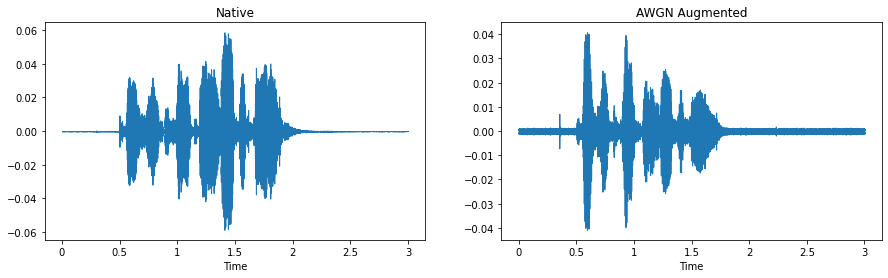

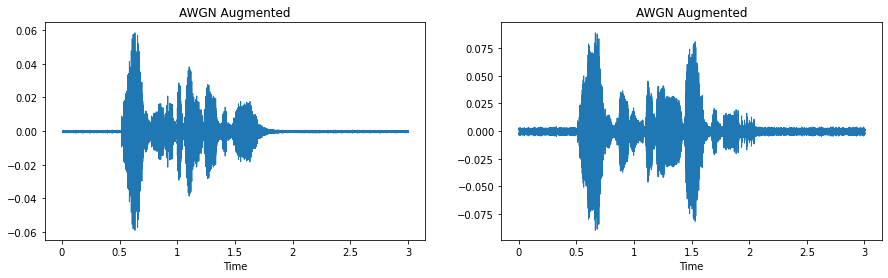

In [45]:
plt.figure(figsize=(15,4))
plt.subplot(1, 2, 1)
librosa.display.waveshow(waveforms[12], sr=sample_rate)
plt.title('Native')

plt.subplot(1, 2, 2)
# augmented waveforms are 2D len 1440 list with 2 waveforms in each position
librosa.display.waveshow(augmented_waveforms_temp[0][0], sr=sample_rate)
plt.title('AWGN Augmented')
plt.show()

plt.figure(figsize=(15,4))
plt.subplot(1, 2, 1)
librosa.display.waveshow(augmented_waveforms_temp[2][0], sr=sample_rate)
plt.title('AWGN Augmented')

plt.subplot(1, 2, 2)
librosa.display.waveshow(augmented_waveforms_temp[7][0], sr=sample_rate)
plt.title('AWGN Augmented')
plt.show()

# Format Data into Tensor Ready 4D Arrays

In [46]:
X_train = np.expand_dims(features_train,1)
X_valid = np.expand_dims(features_valid, 1)
X_test = np.expand_dims(features_test,1)
y_train = np.array(y_train)
y_valid = np.array(y_valid)
y_test = np.array(y_test)
print(f'Shape of 4D feature array for input tensor: {X_train.shape} train, {X_valid.shape} validation, {X_test.shape} test')
print(f'Shape of emotion labels: {y_train.shape} train, {y_valid.shape} validation, {y_test.shape} test')

Shape of 4D feature array for input tensor: (2982, 1, 40, 282) train, (372, 1, 40, 282) validation, (390, 1, 40, 282) test
Shape of emotion labels: (2982,) train, (372,) validation, (390,) test


# Feature Scaling

In [47]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
N,C,H,W = X_train.shape
X_train = np.reshape(X_train, (N,-1)) 
X_train = scaler.fit_transform(X_train)
X_train = np.reshape(X_train, (N,C,H,W))
N,C,H,W = X_valid.shape
X_valid = np.reshape(X_valid, (N,-1))
X_valid = scaler.transform(X_valid)
X_valid = np.reshape(X_valid, (N,C,H,W))
N,C,H,W = X_test.shape
X_test = np.reshape(X_test, (N,-1))
X_test = scaler.transform(X_test)
X_test = np.reshape(X_test, (N,C,H,W))
print(f'X_train scaled:{X_train.shape}, y_train:{y_train.shape}')
print(f'X_valid scaled:{X_valid.shape}, y_valid:{y_valid.shape}')
print(f'X_test scaled:{X_test.shape}, y_test:{y_test.shape}')

X_train scaled:(2982, 1, 40, 282), y_train:(2982,)
X_valid scaled:(372, 1, 40, 282), y_valid:(372,)
X_test scaled:(390, 1, 40, 282), y_test:(390,)


# Save and Reload Data as NumPy Arrays

In [48]:
filename = 'features+labels.npy'
with open(filename, 'wb') as f:
    np.save(f, X_train)
    np.save(f, X_valid)
    np.save(f, X_test)
    np.save(f, y_train)
    np.save(f, y_valid)
    np.save(f, y_test)

print(f'Features and labels saved to {filename}')

Features and labels saved to features+labels.npy


In [49]:
filename = 'features+labels.npy'
with open(filename, 'rb') as f:
    X_train = np.load(f)
    X_valid = np.load(f)
    X_test = np.load(f)
    y_train = np.load(f)
    y_valid = np.load(f)
    y_test = np.load(f)
print(f'X_train:{X_train.shape}, y_train:{y_train.shape}')
print(f'X_valid:{X_valid.shape}, y_valid:{y_valid.shape}')
print(f'X_test:{X_test.shape}, y_test:{y_test.shape}')

X_train:(2982, 1, 40, 282), y_train:(2982,)
X_valid:(372, 1, 40, 282), y_valid:(372,)
X_test:(390, 1, 40, 282), y_test:(390,)


In [50]:
class parallel_all_you_want(nn.Module):
    def __init__(self,num_emotions):
        super().__init__() 
        
        self.transformer_maxpool = nn.MaxPool2d(kernel_size=[1,4], stride=[1,4])
        
        transformer_layer = nn.TransformerEncoderLayer(
            d_model=40, #40
            nhead=4, 
            dim_feedforward=512, 
            dropout=0.4, 
            activation='relu' 
        )
        
        self.transformer_encoder = nn.TransformerEncoder(transformer_layer, num_layers=4)
        self.conv2Dblock1 = nn.Sequential(
            
            nn.Conv2d(
                in_channels=1, 
                out_channels=16, 
                kernel_size=3, 
                stride=1,
                padding=1
                      ),
            nn.BatchNorm2d(16), 
            nn.ReLU(), 
            nn.MaxPool2d(kernel_size=2, stride=2), 
            nn.Dropout(p=0.3), 
            
            
            nn.Conv2d(
                in_channels=16, 
                out_channels=32, 
                kernel_size=3,
                stride=1,
                padding=1
                      ),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=4, stride=4), 
            nn.Dropout(p=0.3), 
            nn.Conv2d(
                in_channels=32,
                out_channels=64,
                kernel_size=3,
                stride=1,
                padding=1
                      ),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=4, stride=4),
            nn.Dropout(p=0.3),
        )
        self.conv2Dblock2 = nn.Sequential(
            nn.Conv2d(
                in_channels=1,
                out_channels=16,
                kernel_size=3,
                stride=1,
                padding=1
                      ),
            nn.BatchNorm2d(16),
            nn.ReLU(), 
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(p=0.3), 
            nn.Conv2d(
                in_channels=16, 
                out_channels=32,
                kernel_size=3,
                stride=1,
                padding=1
                      ),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=4, stride=4), 
            nn.Dropout(p=0.3), 
            nn.Conv2d(
                in_channels=32,
                out_channels=64,
                kernel_size=3,
                stride=1,
                padding=1
                      ),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=4, stride=4),
            nn.Dropout(p=0.3),
        )
        self.fc1_linear = nn.Linear(512*2+40,num_emotions)  
        self.softmax_out = nn.Softmax(dim=1)
    def forward(self,x):
        conv2d_embedding1 = self.conv2Dblock1(x) 
        conv2d_embedding1 = torch.flatten(conv2d_embedding1, start_dim=1) 
        conv2d_embedding2 = self.conv2Dblock2(x) 
        conv2d_embedding2 = torch.flatten(conv2d_embedding2, start_dim=1) 
        x_maxpool = self.transformer_maxpool(x)
        x_maxpool_reduced = torch.squeeze(x_maxpool,1)
        x = x_maxpool_reduced.permute(2,0,1) 
        transformer_output = self.transformer_encoder(x)
        transformer_embedding = torch.mean(transformer_output, dim=0) 
        complete_embedding = torch.cat([conv2d_embedding1, conv2d_embedding2,transformer_embedding], dim=1)  
        output_logits = self.fc1_linear(complete_embedding)  
        output_softmax = self.softmax_out(output_logits)
        return output_logits, output_softmax

In [51]:
model = parallel_all_you_want(len(emotions_dict))
print(model)

parallel_all_you_want(
  (transformer_maxpool): MaxPool2d(kernel_size=[1, 4], stride=[1, 4], padding=0, dilation=1, ceil_mode=False)
  (transformer_encoder): TransformerEncoder(
    (layers): ModuleList(
      (0): TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=40, out_features=40, bias=True)
        )
        (linear1): Linear(in_features=40, out_features=512, bias=True)
        (dropout): Dropout(p=0.4, inplace=False)
        (linear2): Linear(in_features=512, out_features=40, bias=True)
        (norm1): LayerNorm((40,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((40,), eps=1e-05, elementwise_affine=True)
        (dropout1): Dropout(p=0.4, inplace=False)
        (dropout2): Dropout(p=0.4, inplace=False)
      )
      (1): TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=40, out_features=40, bias=Tru

In [52]:
 def criterion(predictions, targets): 
    return nn.CrossEntropyLoss()(input=predictions, target=targets)

In [53]:
def matcher(val):
    if pred == 0:
        print('surprised')
    elif pred==1:
        print('neutral')
    elif pred==2:
        print('calm')
    elif pred==3:
        print('happy')
    elif pred==4:
        print('sad')
    elif pred==5:
        print('angry')
    elif pred==6:
        print('fearful')
    elif pred==7:
        print('disgust')

Choose Optimizer

In [54]:
optimizer = torch.optim.SGD(model.parameters(),lr=0.1, weight_decay=1e-3, momentum=0.8)#Adam
#optimizer_ = torch.optim.Adam(model.parameters(),lr=0.01, weight_decay=1e-3)

In [55]:
def make_train_step(model, criterion, optimizer):
    def train_step(X,Y):
        
        # forward pass
        output_logits, output_softmax = model(X)
        predictions = torch.argmax(output_softmax,dim=1)
        accuracy = torch.sum(Y==predictions)/float(len(Y))
        loss = criterion(output_logits, Y) 
        loss.backward()
        optimizer.step()
        optimizer.zero_grad() 
        
        return loss.item(), accuracy*100
    return train_step

In [56]:
def make_validate_fnc(model,criterion):
    def validate(X,Y):
        with torch.no_grad(): 
            model.eval()
            output_logits, output_softmax = model(X)
            predictions = torch.argmax(output_softmax,dim=1)
            accuracy = torch.sum(Y==predictions)/float(len(Y))
            loss = criterion(output_logits,Y)
            
        return loss.item(), accuracy*100, predictions
    return validate

In [57]:
def make_save_checkpoint(): 
    def save_checkpoint(optimizer, model, epoch, filename):
        checkpoint_dict = {
            'optimizer': optimizer.state_dict(),
            'model': model.state_dict(),
            'epoch': epoch
        }
        torch.save(checkpoint_dict, filename)
    return save_checkpoint

def load_checkpoint(optimizer, model, filename):
    checkpoint_dict = torch.load(filename)
    epoch = checkpoint_dict['epoch']
    model.load_state_dict(checkpoint_dict['model'])
    if optimizer is not None:
        optimizer.load_state_dict(checkpoint_dict['optimizer'])
    return epoch

In [58]:
train_size = X_train.shape[0]
minibatch = 32
model = parallel_all_you_want(num_emotions=len(emotions_dict)) 
print('Number of trainable params: ',sum(p.numel() for p in model.parameters()) )
optimizer = torch.optim.SGD(model.parameters(),lr=0.01, weight_decay=1e-2, momentum=0.8)
#optimizer_ = torch.optim.Adam(model.parameters(),lr=0.01, weight_decay=1e-3)
save_checkpoint = make_save_checkpoint()
train_step = make_train_step(model, criterion, optimizer=optimizer)
validate = make_validate_fnc(model,criterion)
train_losses=[]
valid_losses = []
def train(optimizer, model, num_epochs, X_train, Y_train, X_valid, Y_valid):

    for epoch in range(num_epochs):
        model.train()         
        
        train_indices = np.random.permutation(train_size) 
        X_train = X_train[train_indices,:,:,:] 
        Y_train = Y_train[train_indices] 
        epoch_acc = 0 
        epoch_loss = 0
        num_iterations = int(train_size / minibatch)
        for i in range(num_iterations):
            batch_start = i * minibatch 
            batch_end = min(batch_start + minibatch, train_size) 
            actual_batch_size = batch_end-batch_start 
            X = X_train[batch_start:batch_end,:,:,:] 
            Y = Y_train[batch_start:batch_end] 
            X_tensor = torch.tensor(X).float() 
            Y_tensor = torch.tensor(Y, dtype=torch.long)
            loss, acc = train_step(X_tensor,Y_tensor) 
            epoch_acc += acc * actual_batch_size / train_size
            epoch_loss += loss * actual_batch_size / train_size
            print('\r'+f'Epoch {epoch}: iteration {i}/{num_iterations}',end='')
        
        X_valid_tensor = torch.tensor(X_valid).float()
        Y_valid_tensor = torch.tensor(Y_valid,dtype=torch.long)
        valid_loss, valid_acc, _ = validate(X_valid_tensor,Y_valid_tensor)
        train_losses.append(epoch_loss)
        valid_losses.append(valid_loss)
        checkpoint_filename = '\\MachineLearning dataset\checkpoint_1-{:03d}.pkl'.format(epoch)
        save_checkpoint(optimizer, model, epoch, checkpoint_filename)
        print(f'\nEpoch {epoch} --- loss:{epoch_loss:.3f}, Epoch accuracy:{epoch_acc:.2f}%, Validation loss:{valid_loss:.3f}, Validation accuracy:{valid_acc:.2f}%')

Number of trainable params:  248488


In [59]:
num_epochs = 10 #500

# train it!
train(optimizer, model, num_epochs, X_train, y_train, X_valid, y_valid)

Epoch 0: iteration 92/93
Epoch 0 --- loss:2.958, Epoch accuracy:27.10%, Validation loss:2.109, Validation accuracy:31.18%
Epoch 1: iteration 92/93
Epoch 1 --- loss:1.540, Epoch accuracy:39.60%, Validation loss:1.859, Validation accuracy:36.56%
Epoch 2: iteration 92/93
Epoch 2 --- loss:1.378, Epoch accuracy:46.14%, Validation loss:1.861, Validation accuracy:32.80%
Epoch 3: iteration 92/93
Epoch 3 --- loss:1.288, Epoch accuracy:49.16%, Validation loss:1.794, Validation accuracy:38.71%
Epoch 4: iteration 92/93
Epoch 4 --- loss:1.183, Epoch accuracy:55.26%, Validation loss:1.975, Validation accuracy:39.25%
Epoch 5: iteration 92/93
Epoch 5 --- loss:1.142, Epoch accuracy:57.41%, Validation loss:1.779, Validation accuracy:41.94%
Epoch 6: iteration 92/93
Epoch 6 --- loss:1.068, Epoch accuracy:59.99%, Validation loss:1.771, Validation accuracy:46.77%
Epoch 7: iteration 92/93
Epoch 7 --- loss:0.995, Epoch accuracy:62.24%, Validation loss:1.833, Validation accuracy:38.44%
Epoch 8: iteration 92/93

In [60]:
load_folder = '\\MachineLearning dataset\\'  
epoch = '499'
model_name = f'\\MachineLearning dataset\\checkpoint_1-499.pkl'
load_path = os.path.join(load_folder, model_name)
model = parallel_all_you_want(len(emotions_dict))
load_checkpoint(optimizer, model, load_path)

print(f'Loaded model from {load_path}')

Loaded model from \MachineLearning dataset\checkpoint_1-499.pkl


In [6]:
waveforms=get_waveforms('03-01-01-01-01-01-02.wav')

In [61]:
emotions_dict ={
    '0':'surprised',
    '1':'neutral',
    '2':'calm',
    '3':'happy',
    '4':'sad',
    '5':'angry',
    '6':'fearful',
    '7':'disgust'
}
a=[]
validate = make_validate_fnc(model,criterion)
X_test_tensor = torch.tensor(X_test).float()
y_test_tensor = torch.tensor(y_test,dtype=torch.long)
test_loss, test_acc,predicted_emotions = validate(X_test_tensor,y_test_tensor)
for pred in predicted_emotions:
    b=(matcher(pred))
    a.append(b)

disgust
sad
sad
sad
sad
happy
sad
disgust
neutral
sad
disgust
calm
disgust
disgust
calm
sad
sad
sad
calm
sad
sad
fearful
sad
sad
calm
sad
calm
calm
sad
disgust
happy
happy
fearful
disgust
sad
sad
sad
fearful
fearful
fearful
fearful
fearful
disgust
happy
neutral
neutral
happy
happy
happy
sad
disgust
fearful
sad
sad
sad
sad
neutral
happy
disgust
disgust
sad
disgust
disgust
sad
sad
calm
sad
disgust
disgust
disgust
happy
angry
happy
angry
fearful
fearful
fearful
angry
fearful
angry
fearful
angry
angry
angry
angry
angry
angry
angry
angry
angry
fearful
fearful
fearful
fearful
sad
sad
fearful
angry
fearful
fearful
fearful
fearful
fearful
fearful
sad
fearful
sad
sad
fearful
angry
disgust
happy
disgust
happy
sad
sad
sad
sad
disgust
disgust
disgust
disgust
angry
disgust
disgust
disgust
disgust
disgust
disgust
disgust
neutral
neutral
neutral
neutral
sad
sad
sad
sad
sad
sad
happy
neutral
neutral
disgust
disgust
neutral
sad
disgust
sad
sad
calm
calm
neutral
calm
neutral
neutral
neutral
neutral
calm

In [183]:
waveforms=get_waveforms('03-01-01-01-01-01-02.wav')

In [190]:
print(waveforms)

[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -2.49433469e-06
 -3.20859954e-07  1.90591538e-06]


In [201]:
def inputfun(weveforms):
    test_set = []
    X_test = []
    y_test = []
    waveforms_ = np.array(waveforms)
    for emotion_num in range(len(emotions_dict)):
        emotion_indices_ = [index for index, emotion in enumerate(emotions) if int(emotion)==emotion_num]
        np.random.seed(69)
        emotion_indices = np.random.permutation(emotion_indices_)
        dim = len(emotion_indices_)
        test_indices = emotion_indices_[int(0.9*dim):]
    # create test waveforms/labels sets
        X_test.append(waveforms_[test_indices,:])
        y_test.append(np.array([emotion_num]*len(test_indices),dtype=np.int32))
        test_set.append(test_indices)


    X_train = np.concatenate(X_train,axis=0)
    X_valid = np.concatenate(X_valid,axis=0)
    X_test = np.concatenate(X_test,axis=0)

# concatenate, in order, all emotions back into one array 
    y_test = np.concatenate(y_test,axis=0)
    test_set = np.concatenate(test_set,axis=0)
    #print(f'Training waveforms:{X_train.shape}, y_train:{y_train.shape}')
    #print(f'Validation waveforms:{X_valid.shape}, y_valid:{y_valid.shape}')
    print(f'Test waveforms:{X_test.shape}, y_test:{y_test.shape}')
    uniques, count = np.unique(np.concatenate([train_set,test_set,valid_set],axis=0), return_counts=True)
    if sum(count==1) == len(emotions):
        print(f'\nSets are unique: {sum(count==1)} samples out of {len(emotions)} are unique')
    else:
        print(f'\nSets are NOT unique: {sum(count==1)} samples out of {len(emotions)} are unique')

In [186]:
featurespect=feature_melspectrogram(
    waveforms, 
    sample_rate,
    fft = 1024,
    winlen = 512,
    window='hamming',
    hop=256,
    mels=128,
    )

In [188]:
feat_mfcc=feature_mfcc(
    waveforms, 
    sample_rate,
    n_mfcc = 40,
    fft = 1024,
    winlen = 512,
    window='hamming',
    #hop=256, 
    mels=128
    )

In [197]:
import psycopg2
conn= psycopg2.connect(database="postgres", user = "postgres", password = "postavaa", host = "127.0.0.1", port = "5432")
cursor = conn.cursor()
for d in a:
    ul=str(d)
    #print(ul)
    cursor.execute("INSERT into cyberdata_ VALUES (%s)",[d])
conn.commit()
conn.close()